Задача 1.  
Загрузить данные из файла data.csv. В таблице приведены названия столбцов и соответствуюшие вопросы:
| Название столбца | Вопрос                                          |
|------------------|-------------------------------------------------|
| is_stud          | Вы студент?                                     |
| group            | Из какой группы?                                |
| sex              | Ваш пол                                         |
| work_status      | Вы работаете?                                   |
| fav_year         | Какой год обучения вам понравился больше всего? |
| visit_freq       | Оцените, как часто выпосещаете пары?            |
| usd_pred         | Ваш прогноз на курс доллара на 01.01.2025       |
| random_value     | Сгенерируйте число от 0 до 1                    |


In [1]:
import pandas as pd

# Загружаем данные из файла data.csv
data = pd.read_csv('data.csv')

Задача 2.  
Визуализировать данные таблицы, рассчитать некоторые базовые статистики. Дать описание используемых в п.3-п.4 данных (например, кол-во студентов в группах, кол-во по полу, доля работающих в группах и т.п.)

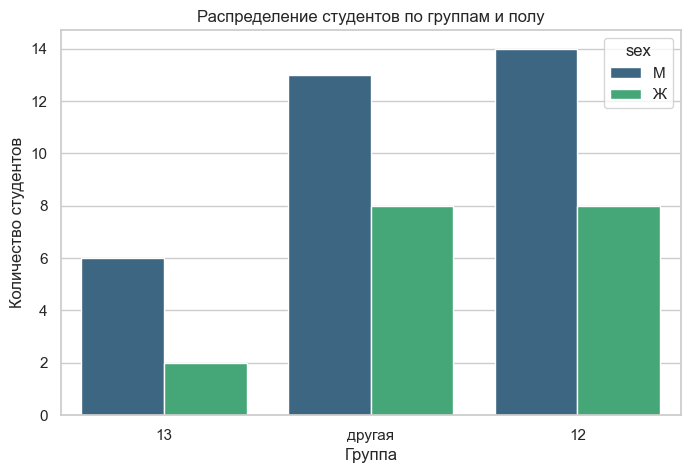

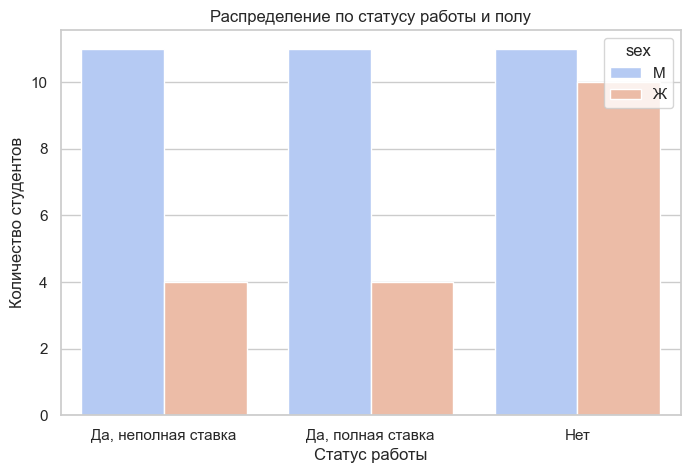

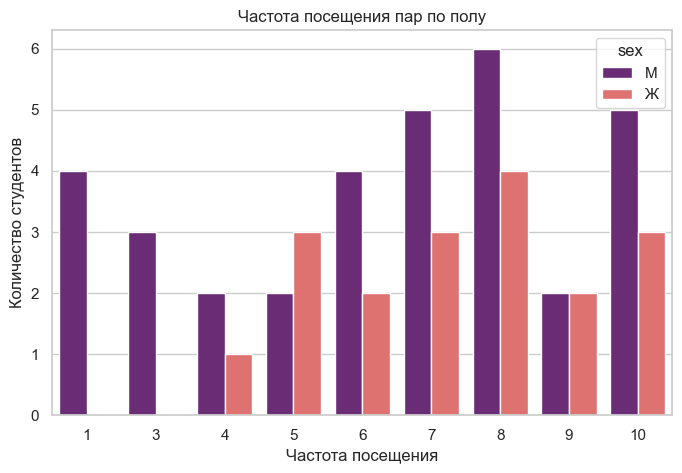

Статистики по частоте посещения пар (visit_freq):
Среднее: 6.627450980392157
Медиана: 7.0
Мода: 8
Минимум: 1
Максимум: 10
Стандартное отклонение: 2.5919937061167837

Статистики по прогнозу курса доллара (usd_pred):
Среднее: 3.478458823529412
Медиана: 3.4
Мода: 3.3
Минимум: 2.0
Максимум: 5.0
Стандартное отклонение: 0.468135638966516

Статистики по случайному значению (random_value):
Среднее: 0.600816381254902
Медиана: 0.64
Мода: 0.88
Минимум: 0.0
Максимум: 0.99
Стандартное отклонение: 0.31452841370792106



In [6]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Гистограмма распределения студентов по группам
plt.figure(figsize=(8, 5))
sb.countplot(x='group', hue='sex', data=data, palette="viridis")
plt.title("Распределение студентов по группам и полу")
plt.xlabel("Группа")
plt.ylabel("Количество студентов")
plt.show()

# Гистограмма распределения по статусу работы
plt.figure(figsize=(8, 5))
sb.countplot(x='work_status', hue='sex', data=data, palette="coolwarm")
plt.title("Распределение по статусу работы и полу")
plt.xlabel("Статус работы")
plt.ylabel("Количество студентов")
plt.show()

# Гистограмма частоты посещения пар
plt.figure(figsize=(8, 5))
sb.countplot(x='visit_freq', hue='sex', data=data, palette="magma")
plt.title("Частота посещения пар по полу")
plt.xlabel("Частота посещения")
plt.ylabel("Количество студентов")
plt.show()

# Статистика для столбца 'visit_freq'
print("Статистики по частоте посещения пар (visit_freq):")
print("Среднее:", data['visit_freq'].mean())
print("Медиана:", data['visit_freq'].median())
print("Мода:", data['visit_freq'].mode()[0])
print("Минимум:", data['visit_freq'].min())
print("Максимум:", data['visit_freq'].max())
print("Стандартное отклонение:", data['visit_freq'].std())
print()

# Статистика для столбца 'usd_pred'
print("Статистики по прогнозу курса доллара (usd_pred):")
print("Среднее:", data['usd_pred'].mean())
print("Медиана:", data['usd_pred'].median())
print("Мода:", data['usd_pred'].mode()[0])
print("Минимум:", data['usd_pred'].min())
print("Максимум:", data['usd_pred'].max())
print("Стандартное отклонение:", data['usd_pred'].std())
print()

# Статистика для столбца 'random_value'
print("Статистики по случайному значению (random_value):")
print("Среднее:", data['random_value'].mean())
print("Медиана:", data['random_value'].median())
print("Мода:", data['random_value'].mode()[0])
print("Минимум:", data['random_value'].min())
print("Максимум:", data['random_value'].max())
print("Стандартное отклонение:", data['random_value'].std())
print()


Задача 3.  
Выдвинуть 2 гипотезы относительно влияния фактора на бинарную метрику. С помощью Биномиального теста (логику теста реализовать самому) проверить гипотезы, дать интерпретацию полученных результатов.

Пример формулировки гипотезы:  
Предположим, что каждый студент с некоторой вероятностью p1 приходит на занятие.  
Студентов можно разделить на 2 группы по признаку наличия работы. X1 – работающие студенты, X2 – не работающие.  
Хотим проверить, одинакова ли частота посещения пар среди групп. H0 : p1 = p2.  
Гипотеза: Фактор «студент работает/не работает» не влияет на «посещаемость».


In [10]:
# Гипотеза 1. Влияние пола на предсказание курса доллара.
# Предположим, что вероятность предсказания курса доллара для студентов
# мужского пола (p1) и женского пола (p2) равны.
# H0: p1 = p2
# Гипотеза: фактор "пол" не влияет на предсказание курса доллара

# Гипотеза 2. Влияние статуса работы на предсказание курса доллара.
# Предположим, что вероятность предсказания курса доллара для работающих
# студентов (p3) и не работающих (p4) равны.
# H0: p3 = p4
# Гипотеза: фактор "статус работы" не влияет на предсказание курса доллара

import pandas as pd
import numpy as np
from math import comb

# Функция для выполнения биномиального теста вручную
def manual_binomial_test(successes, trials, p):
    cumulative_prob = 0
    for k in range(successes, trials + 1):
        cumulative_prob += comb(trials, k) * (p ** k) * ((1 - p) ** (trials - k))
    return cumulative_prob

# Гипотеза 1: Влияние пола на предсказание курса доллара
male_predictions = data[(data['sex'] == 'М') & (data['usd_pred'] > 0)]
female_predictions = data[(data['sex'] == 'Ж') & (data['usd_pred'] > 0)]

male_successes = male_predictions.shape[0]
total_males = data[data['sex'] == 'М'].shape[0]
p_male = male_successes / total_males  # Вероятность успеха для мужчин

# Проверяем гипотезу
p_value_gender = manual_binomial_test(male_successes, total_males, p_male)

# Гипотеза 2: Влияние статуса работы на предсказание курса доллара
working_predictions = data[(data['work_status'].str.contains("Да")) & (data['usd_pred'] > 0)]
not_working_predictions = data[(data['work_status'].str.contains("Нет")) & (data['usd_pred'] > 0)]

working_successes = working_predictions.shape[0]
total_working = data[data['work_status'].str.contains("Да")].shape[0]
p_working = working_successes / total_working  # Вероятность успеха для работающих

# Проверяем гипотезу
p_value_work_status = manual_binomial_test(working_successes, total_working, p_working)

# Интерпретация результатов
print(f'P-value для гипотезы 1 (влияние пола): {p_value_gender}')
print(f'P-value для гипотезы 2 (влияние статуса работы): {p_value_work_status}')

alpha = 0.05  # Уровень значимости

if p_value_gender < alpha:
    print("Отвергаем H0 для гипотезы 1: Пол влияет на предсказание курса доллара.")
else:
    print("Не можем отвергнуть H0 для гипотезы 1: Пол не влияет на предсказание курса доллара.")

if p_value_work_status < alpha:
    print("Отвергаем H0 для гипотезы 2: Статус работы влияет на предсказание курса доллара.")
else:
    print("Не можем отвергнуть H0 для гипотезы 2: Статус работы не влияет на предсказание курса доллара.")


P-value для гипотезы 1 (влияние пола): 1.0
P-value для гипотезы 2 (влияние статуса работы): 1.0
Не можем отвергнуть H0 для гипотезы 1: Пол не влияет на предсказание курса доллара.
Не можем отвергнуть H0 для гипотезы 2: Статус работы не влияет на предсказание курса доллара.


Задача 4.  
Выдвинуть 2 гипотезы относительно влияния фактора на непрерывную метрику. С помощью t-критерия Стьюдента проверить гипотезы, дать интерпретацию полученных результатов.

In [15]:
# Гипотеза 1. Влияние пола на предсказание курса доллара
# Предположим, что мужчины и женщины имеют одинаковые средние предсказания курса доллара
# H0 : среднее предсказание курса доллара для мужчин = среднее предсказание курса доллара для женщин
# Гипотеза: фактор "пол" не влияет на предсказания курса долларра

# Гипотеза 2. Влияние статуса работы на предсказания курса доллара
# Предположим, что работающие и не работающие студенты имеют одинаковые средние предсказания курса доллара
# H0 : среднее предсказание курса доллара для работающих = среднее предсказание курса доллара для не работающих
# Гипотеза: фактор "статус работы" не влияет на предсказания курса доллара

import pandas as pd
from scipy import stats

# Загружаем данные из файла
data = pd.read_csv('data.csv')

# Гипотеза 1: Влияние пола на предсказания курса доллара
male_predictions = data[data['sex'] == 'М']['usd_pred']
female_predictions = data[data['sex'] == 'Ж']['usd_pred']

# Гипотеза 2: Влияние статуса работы на предсказания курса доллара
working_predictions = data[data['work_status'].str.contains("Да")]['usd_pred']
not_working_predictions = data[data['work_status'].str.contains("Нет")]['usd_pred']

# Выполняем t-тест
t_stat_gender, p_value_gender = stats.ttest_ind(male_predictions, female_predictions, equal_var=False)
t_stat_work_status, p_value_work_status = stats.ttest_ind(working_predictions, not_working_predictions, equal_var=False)

# Интерпретация результатов
print(f'Гипотеза 1: Влияние пола на предсказания курса доллара')
print(f't-статистика: {t_stat_gender:.3f}, p-значение: {p_value_gender:.3f}')

alpha = 0.05  # Уровень значимости
if p_value_gender < alpha:
    print("Отвергаем H0 для гипотезы 1: Пол влияет на предсказания курса доллара.")
else:
    print("Не можем отвергнуть H0 для гипотезы 1: Пол не влияет на предсказания курса доллара.")

print(f'\nГипотеза 2: Влияние статуса работы на предсказания курса доллара')
print(f't-статистика: {t_stat_work_status:.3f}, p-значение: {p_value_work_status:.3f}')

if p_value_work_status < alpha:
    print("Отвергаем H0 для гипотезы 2: Статус работы влияет на предсказания курса доллара.")
else:
    print("Не можем отвергнуть H0 для гипотезы 2: Статус работы не влияет на предсказания курса доллара.")


Гипотеза 1: Влияние пола на предсказания курса доллара
t-статистика: 0.472, p-значение: 0.641
Не можем отвергнуть H0 для гипотезы 1: Пол не влияет на предсказания курса доллара.

Гипотеза 2: Влияние статуса работы на предсказания курса доллара
t-статистика: 0.769, p-значение: 0.446
Не можем отвергнуть H0 для гипотезы 2: Статус работы не влияет на предсказания курса доллара.
